# Coronavirus Government Resopnse Tracker

[Link](https://www.europeandataportal.eu/en/covid-19/stories/track-government-measures-covid-19-oxford-government-response-tracker)

In [59]:
# Import the standard libraries
import pandas as pd
import numpy as np
import json
import requests
# Daytime
from datetime import datetime
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Some Visualization settings
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')
sns.set_style("darkgrid")

## Download data via API

Attention: Not all relevant data is included in the jsonfile. Therefore, this interface is only suitable for recording the corona numbers for each country

In [60]:
# Create API url
url = 'https://covidtrackerapi.bsg.ox.ac.uk/api/v2/stringency/date-range/'
start_date = '2020-01-01'
date = datetime.today().strftime('%Y-%m-%d')
url = url+start_date+'/'+date

# Data download
param = dict()
resp = requests.get(url=url, params=param)
data = resp.json()
#print(json.dumps(data, indent=4))

# Save data as a .json file
with open('data.json', 'w') as outfile:
    json.dump(data, outfile)

## Download the data as csv file

In [56]:
url = 'https://raw.githubusercontent.com/OxCGRT/covid-policy-tracker/master/data/OxCGRT_latest.csv'
df = pd.read_csv(url,sep=",") 
df.head()

,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,...,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
0,Aruba,ABW,20200101,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aruba,ABW,20200102,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Aruba,ABW,20200103,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Aruba,ABW,20200104,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aruba,ABW,20200105,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
# Shape of the dataset
df.shape

(29948, 42)

In [44]:
# Data by country
by_country = df.groupby(by = 'CountryName')[df.columns[2]].count().sort_values(ascending=False)
by_country

CountryName
Kuwait              170
Papua New Guinea    170
Brazil              170
Spain               170
South Korea         170
                   ... 
Vanuatu             167
Solomon Islands     164
Turkmenistan        160
Latvia              107
Gibraltar            90
Name: Date, Length: 178, dtype: int64

In [45]:
# Number of different countries
len(by_country)

178

In [46]:
# Count the missing values
by_country_na = df.drop('CountryName', 1).isna().groupby(df.CountryName, sort=False).sum().reset_index()
by_country_na.head()

,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,...,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
0,Aruba,0.0,0.0,6.0,106.0,6.0,86.0,6.0,119.0,6.0,...,6.0,0.0,6.0,0.0,6.0,0.0,6.0,0.0,6.0,0.0
1,Afghanistan,0.0,0.0,9.0,82.0,9.0,92.0,9.0,69.0,9.0,...,9.0,3.0,9.0,3.0,9.0,3.0,9.0,3.0,9.0,3.0
2,Angola,0.0,0.0,1.0,84.0,1.0,87.0,1.0,87.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,13.0,7.0
3,Albania,0.0,0.0,2.0,70.0,2.0,72.0,2.0,70.0,2.0,...,2.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0
4,Andorra,0.0,0.0,5.0,91.0,5.0,78.0,5.0,77.0,5.0,...,5.0,0.0,5.0,0.0,6.0,0.0,6.0,0.0,6.0,0.0


In [47]:
# Missing values of a specific country
country_name = 'France' #'Germany'
by_country_na[by_country_na['CountryName']==country_name]

,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,...,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
56,France,0.0,0.0,0.0,61.0,0.0,76.0,0.0,72.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


,CountryName,CountryCode,Date,C1_School closing,C1_Flag,C2_Workplace closing,C2_Flag,C3_Cancel public events,C3_Flag,C4_Restrictions on gatherings,...,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
0,France,FRA,20200101,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,France,FRA,20200102,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,France,FRA,20200103,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,France,FRA,20200104,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,France,FRA,20200105,0.0,NaN,0.0,NaN,0.0,NaN,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


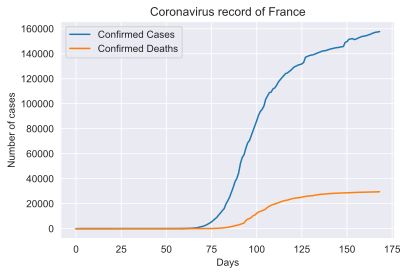

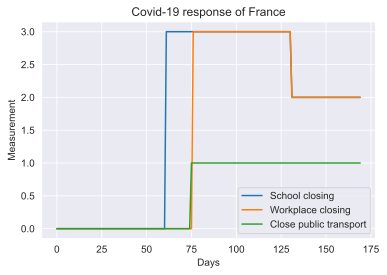

In [48]:
# Data visualization
country_name = 'France'
# Reorder the list
df_country = df[df['CountryName']==country_name].sort_values(by=['Date']).reset_index(drop=True)
display(df_country.head())

# Coronavirus case
#plt.figure(figsize=(8,6))
plt.plot(np.arange(df_country.shape[0]),df_country['ConfirmedCases'],label='Confirmed Cases')
plt.plot(np.arange(df_country.shape[0]),df_country['ConfirmedDeaths'],label='Confirmed Deaths')
plt.legend()
plt.title('Coronavirus record of '+country_name)
plt.ylabel('Number of cases')
plt.xlabel('Days')
plt.show()

# Government response
#plt.figure(figsize=(8,6))
plt.plot(np.arange(df_country.shape[0]),df_country['C1_School closing'],label='School closing')
plt.plot(np.arange(df_country.shape[0]),df_country['C2_Workplace closing'],label='Workplace closing')
plt.plot(np.arange(df_country.shape[0]),df_country['C5_Close public transport'],label='Close public transport')
plt.legend()
plt.title('Covid-19 response of '+country_name)
plt.ylabel('Measurement')
plt.xlabel('Days')
plt.show()

**School cloosing**<br>
0 - no measures<br>
1 - recommend closing<br>
2 - require closing (only some levels or categories, eg just high school, or just public schools)<br>
3 - require closing all levels<br>
Blank - no data

**Workplace closing**<br>
0 - no measures<br>
1 - recommend closing (or recommend work from home)<br>
2 - require closing (or work from home) for some sectors or categories of workers<br>
3 - require closing (or work from home) for all-but-essential workplaces (eg grocery stores, doctors)<br>
Blank - no data

**Close public transport**<br>
0 - no measures<br>
1 - recommend closing (or significantly reduce volume/route/means of transport available)<br>
2 - require closing (or prohibit most citizens from using it)<br>
Blank - no data


# RKI COVID-19 Data

[Link](https://npgeo-corona-npgeo-de.hub.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0)

In [1]:
# Import the standard libraries
import pandas as pd
import numpy as np
import json
import requests

# Daytime
from datetime import datetime

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Some Visualization settings
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('svg')
sns.set_style("darkgrid")

In [2]:
url = 'https://opendata.arcgis.com/datasets/dd4580c810204019a7b8eb3e0b329dd6_0.geojson'

# Data download
param = dict()
resp = requests.get(url=url, params=param)
data = resp.json()
#print(json.dumps(data, indent=4))

# Save data as a .json file
with open('RKI_COVID19.json', 'w') as outfile:
    json.dump(data, outfile)

In [3]:
# Load .json file
with open('RKI_COVID19.json') as data_file:    
    data = json.load(data_file)  

In [4]:
# Compile json to dataframe
df = pd.json_normalize(data,'features')
# Drop unnecessary columns
df = df.drop(['type','geometry'],axis=1)
# Rename columns
df.columns = [col.replace('properties.', '') for col in df.columns]
df.head()

,ObjectId,IdBundesland,Bundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
0,12849963,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/14 00:00:00,01001,"18.06.2020, 00:00 Uhr",0,-9,2020/03/16 00:00:00,0,1,1,Nicht übermittelt
1,12849964,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/19 00:00:00,01001,"18.06.2020, 00:00 Uhr",0,-9,2020/03/13 00:00:00,0,1,1,Nicht übermittelt
2,12849965,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/19 00:00:00,01001,"18.06.2020, 00:00 Uhr",0,-9,2020/03/16 00:00:00,0,1,1,Nicht übermittelt
3,12849966,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/21 00:00:00,01001,"18.06.2020, 00:00 Uhr",0,-9,2020/03/13 00:00:00,0,1,1,Nicht übermittelt
4,12849967,1,Schleswig-Holstein,SK Flensburg,A15-A34,M,1,0,2020/03/27 00:00:00,01001,"18.06.2020, 00:00 Uhr",0,-9,2020/03/22 00:00:00,0,1,1,Nicht übermittelt


In [5]:
# Shape of the dataset
df.shape

(151664, 18)

In [11]:
# Data by country
by_state = df.groupby(by = 'Bundesland')[df.columns[2]].count().sort_values(ascending=True)
by_state

Bundesland
Mecklenburg-Vorpommern      728
Bremen                     1247
Sachsen-Anhalt             1553
Saarland                   2159
Schleswig-Holstein         2800
Hamburg                    2855
Brandenburg                2969
Thüringen                  2971
Sachsen                    4535
Rheinland-Pfalz            5996
Berlin                     6718
Hessen                     9207
Niedersachsen             10679
Baden-Württemberg         28413
Nordrhein-Westfalen       31846
Bayern                    36988
Name: Bundesland, dtype: int64

In [14]:
# Count the missing values
by_state_na = df.drop('Bundesland', 1).isnull().groupby(df.Bundesland, sort=False).sum().reset_index()
by_state_na.head()

,Bundesland,ObjectId,IdBundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
0,Schleswig-Holstein,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Hamburg,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Niedersachsen,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,Bremen,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,Nordrhein-Westfalen,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
# Missing values of a specific country
state_name = 'Bayern'
by_country_na[by_country_na['Bundesland']==state_name]

,Bundesland,ObjectId,IdBundesland,Landkreis,Altersgruppe,Geschlecht,AnzahlFall,AnzahlTodesfall,Meldedatum,IdLandkreis,Datenstand,NeuerFall,NeuerTodesfall,Refdatum,NeuGenesen,AnzahlGenesen,IstErkrankungsbeginn,Altersgruppe2
8,Bayern,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
